# Airline Dataset

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights
reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each
flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was
delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight
arriving on time.

In this notebook we explore the <a href="https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time" target="_blank">Airline On-Time Performance</a>
dataset. The dataset can be obtained for free from the IBM Developer <a href="https://developer.ibm.com/exchanges/data/all/airline/" target="_blank">Data Asset Exchange</a>.

## Loading the Data

In [1]:
import requests
import tarfile
from os import path

In [2]:
# Downloading the dataset

fname = 'airline_2m.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

151681776

In [3]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

In [4]:
# Verifying the file was extracted properly
data_path = "airline_2m.csv"
path.exists(data_path)

True

In [5]:
# load dataset into notebook
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
# Using pandas to read the data 
df = pd.read_csv(data_path, encoding = "ISO-8859-1",
                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})
# Preview the first 5 lines of the loaded data 
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Visualization

In [6]:
from matplotlib import pyplot as plt

In [7]:
# Take a smaller sample of the dataset for easier plotting
df_sample = df.sample(n=500)

### Create a Histogram of flight distance

Text(0, 0.5, 'Frequency')

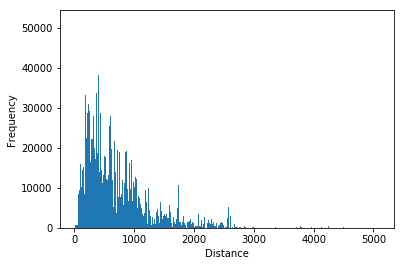

In [8]:
plt.hist(x=df['Distance'], bins='auto')
plt.xlabel('Distance')
plt.ylabel('Frequency')

### Plot elapsed time vs distance

Text(0, 0.5, 'Time')

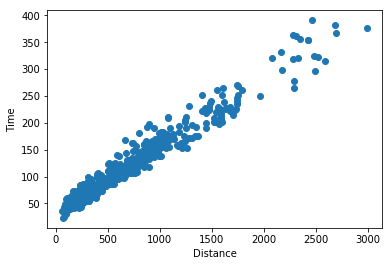

In [9]:
# Generate scatterplot of flight distance vs time
plt.scatter('Distance', 'ActualElapsedTime', data=df_sample)
plt.xlabel('Distance')
plt.ylabel('Time')

### Plot arrival delay over time

Text(0, 0.5, 'Arrival Delay')

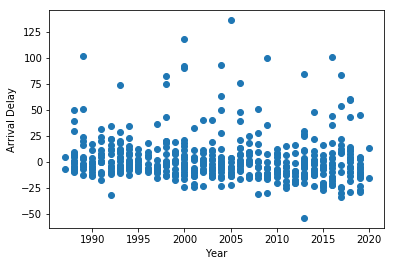

In [10]:
plt.scatter('Year', 'ArrDelay', data=df_sample)
plt.xlabel('Year')
plt.ylabel('Arrival Delay')

### Create a histogram of arrival delay

Text(0, 0.5, 'Frequency')

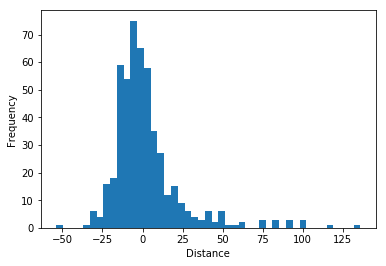

In [11]:
# Set missing values to 0
arvl_delay = df_sample['ArrDelay'].fillna(0)


plt.hist(x=arvl_delay, bins='auto')
plt.xlabel('Distance')
plt.ylabel('Frequency')